**The Spark Founation-DataScience & Business Analystics Internship**

---



**Task-1:**

Prediction in Supervised Machine Learning

*In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.*


**Steps:**

Step1-Importing Library and Load

Step2-Visualizing Data

Step3-Data Prepration

Step4-Training alorithms

Step5-Visualizing the model

Step6-Prediction making 

Step7-Evaluating the model

Code by Chaitanya Dubal 

In [1]:
## Import requried librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# avoid warnings
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
# Reading data from weblink
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_score = pd.read_csv(url)

In [4]:
# now check the data
student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# examine number of columns & rows in data
student_score.shape

(25, 2)

In [6]:
# info about dataset
student_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# Discription of data
student_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# checking null values in dataset 
student_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

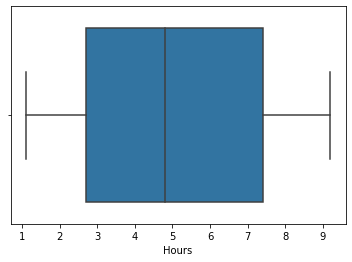

In [9]:
sns.boxplot(student_score['Hours'] )

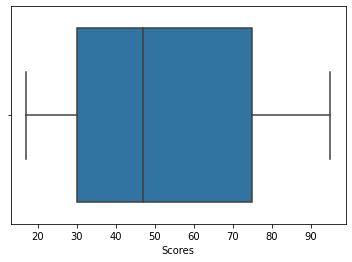

In [10]:
sns.boxplot(student_score['Scores'] )

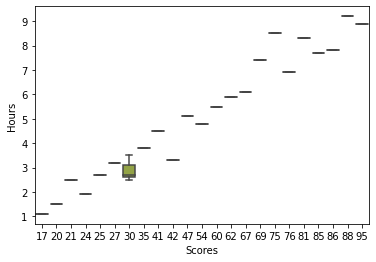

In [11]:
sns.boxplot(student_score['Scores'], student_score['Hours'] )

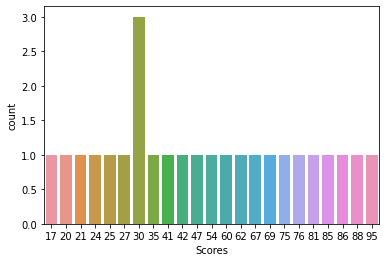

In [12]:
sns.countplot(student_score['Scores'])

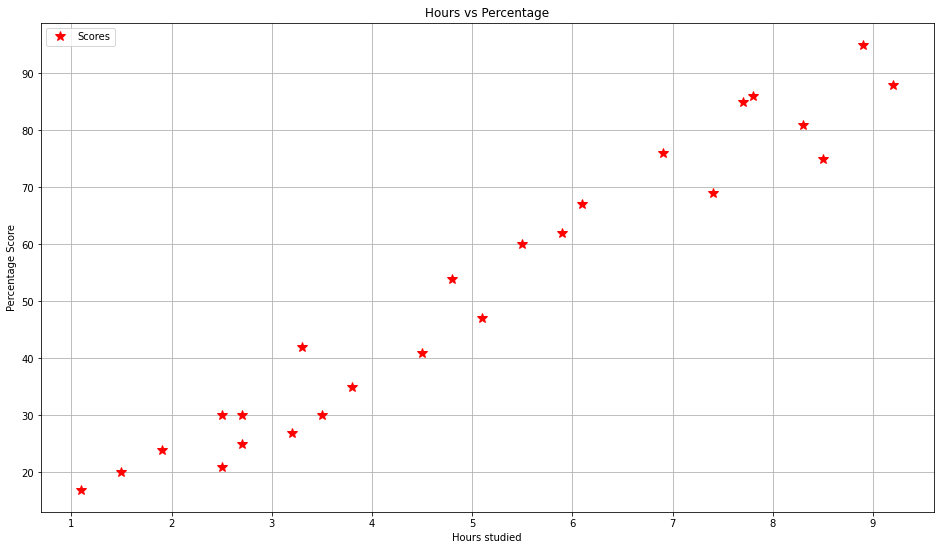

In [13]:
# plot data in graph
plt.rcParams["figure.figsize"] = [16,9]
student_score.plot(x="Hours",y="Scores",style="*",color="red",markersize=10)
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

In [14]:
# correlation between the variables
student_score.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
#using iloc funcation will divide data
x = student_score.iloc[:,:1].values
y = student_score.iloc[:,1:].values

In [17]:
x


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [18]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [19]:
## Splitting data into training&testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

STEP-4 

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

STEP-5

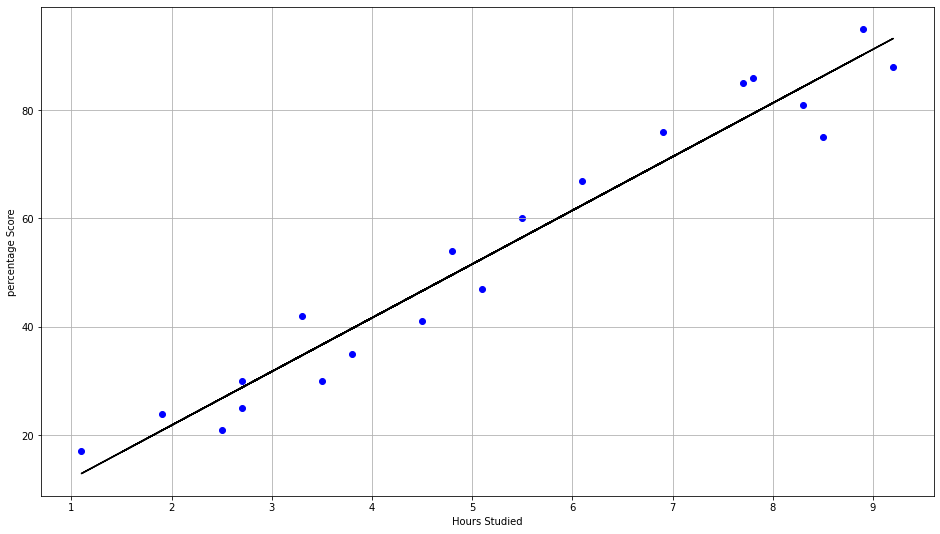

In [21]:
line = model.coef_*x+model.intercept_
# plot for training data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_train,y_train,color="blue")
plt.plot(x,line,color="black");
plt.xlabel("Hours Studied")
plt.ylabel("percentage Score")
plt.grid()
plt.show()

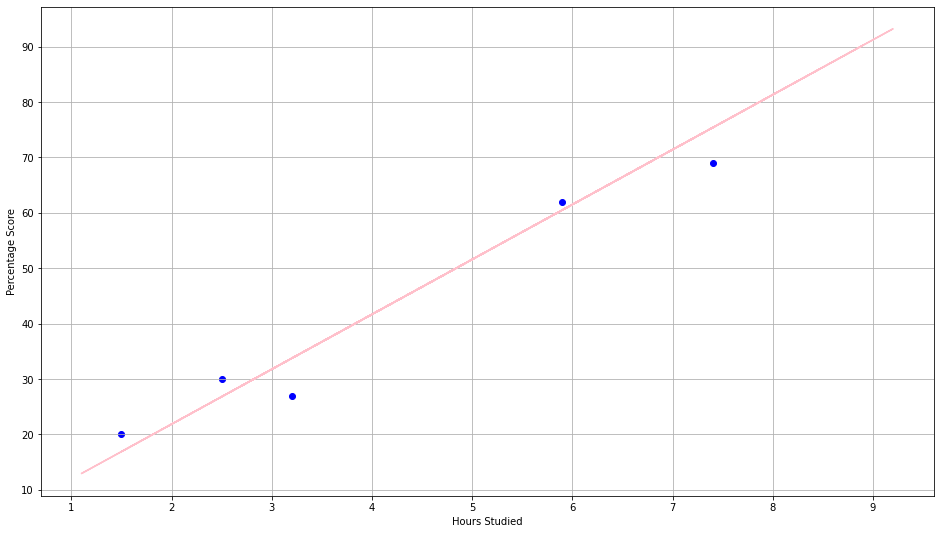

In [22]:
# plotting for the test data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_test,y_test,color="blue")
plt.plot(x,line,color="pink");
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

STEP-6

In [23]:
print(x_test) # In Hours
y_pred = model.predict(x_test) # predicting scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
# comparing the data actual vs predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [25]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [26]:
# comparing actual vs predicted
comparison = pd.DataFrame({"actual":[y_test],"predicted":[y_pred]})
comparison

,actual,predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [27]:
# Testing with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("predicted score if a person studied for",hours,"houes is",own_pred[0])

predicted score if a person studied for 9.25 houes is [93.69173249]


STEP-7

In [28]:
from sklearn import metrics

In [29]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
